In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/irenebratsis/Thinkful/master/economic_freedom_index2019_data.csv', encoding='latin1')

In [3]:
for col in df.columns: 
    print(col)

CountryID
Country Name
WEBNAME
Region
World Rank
Region Rank
2019 Score
Property Rights
Judical Effectiveness
Government Integrity
Tax Burden
Gov't Spending
Fiscal Health
Business Freedom
Labor Freedom
Monetary Freedom
Trade Freedom
Investment Freedom 
Financial Freedom
Tariff Rate (%)
Income Tax Rate (%)
Corporate Tax Rate (%)
Tax Burden % of GDP
Gov't Expenditure % of GDP 
Country
Population (Millions)
GDP (Billions, PPP)
GDP Growth Rate (%)
5 Year GDP Growth Rate (%)
GDP per Capita (PPP)
Unemployment (%)
Inflation (%)
FDI Inflow (Millions)
Public Debt (% of GDP)


In [4]:
df.head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [6]:
df.describe()


,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
count,186.000000,180.000000,180.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,183.000000,...,181.000000,182.000000,183.000000,183.000000,179.000000,182.000000,184.000000,183.000000,182.000000,182.000000
mean,93.500000,90.500000,20.538889,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,...,48.784530,5.986813,28.183060,23.891257,22.157542,33.863736,3.470109,2.984153,10.586264,56.469231
std,53.837719,52.105662,12.738611,11.255725,19.608526,18.104745,19.793193,13.208314,23.150984,31.764160,...,19.483982,5.533568,13.374339,8.858207,10.152671,15.476484,5.835732,2.926503,80.507501,34.163855
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.600000,10.600000,-14.000000,-16.100000,-0.900000,0.000000
25%,47.250000,45.750000,9.750000,53.950000,37.000000,31.000000,27.200000,70.975000,51.700000,39.900000,...,30.000000,2.000000,20.000000,20.000000,14.250000,24.675000,1.800000,1.900000,1.300000,34.950000
50%,93.500000,90.500000,19.500000,60.750000,50.100000,42.900000,35.500000,78.050000,68.800000,80.300000,...,50.000000,4.300000,30.000000,25.000000,20.700000,32.350000,3.200000,3.000000,2.750000,49.900000
75%,139.750000,135.250000,31.000000,67.800000,65.900000,54.700000,50.300000,85.425000,82.600000,91.450000,...,60.000000,8.775000,35.000000,30.000000,29.850000,40.225000,4.650000,4.450000,5.450000,70.125000
max,186.000000,180.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,90.000000,50.000000,60.000000,50.000000,47.000000,139.200000,70.800000,9.900000,1087.500000,236.400000


In [7]:
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['Country Name', 'WEBNAME', 'Region', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'Unemployment (%)',
       'FDI Inflow (Millions)'],
      dtype='object')
The number of non-numerical columns is 9


In [8]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['CountryID', 'World Rank', 'Region Rank', '2019 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'Public Debt (% of GDP)'],
      dtype='object')
The number of numerical columns is 25


In [9]:
df.describe().T
#transpose!

,count,mean,std,min,25%,50%,75%,max
CountryID,186.0,93.500000,53.837719,1.0,47.250,93.50,139.750,186.0
World Rank,180.0,90.500000,52.105662,1.0,45.750,90.50,135.250,180.0
Region Rank,180.0,20.538889,12.738611,1.0,9.750,19.50,31.000,47.0
2019 Score,180.0,60.768333,11.255725,5.9,53.950,60.75,67.800,90.2
Property Rights,185.0,52.327568,19.608526,7.6,37.000,50.10,65.900,97.4
Judical Effectiveness,185.0,44.899459,18.104745,5.0,31.000,42.90,54.700,92.4
Government Integrity,185.0,41.470270,19.793193,7.9,27.200,35.50,50.300,96.7
Tax Burden,180.0,77.212778,13.208314,0.0,70.975,78.05,85.425,99.8
Gov't Spending,183.0,64.203825,23.150984,0.0,51.700,68.80,82.600,96.6
Fiscal Health,183.0,65.996721,31.764160,0.0,39.900,80.30,91.450,100.0


In [10]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Tax Burden % of GDP,7,0.037634
World Rank,6,0.032258
Region Rank,6,0.032258
2019 Score,6,0.032258
Tax Burden,6,0.032258
Unemployment (%),5,0.026882
FDI Inflow (Millions),5,0.026882
Financial Freedom,5,0.026882
Public Debt (% of GDP),4,0.021505
Tariff Rate (%),4,0.021505


In [11]:
df.isnull().sum()*100/df.count()


CountryID                      0.000000
Country Name                   0.000000
WEBNAME                        0.000000
Region                         0.000000
World Rank                     3.333333
Region Rank                    3.333333
2019 Score                     3.333333
Property Rights                0.540541
Judical Effectiveness          0.540541
Government Integrity           0.540541
Tax Burden                     3.333333
Gov't Spending                 1.639344
Fiscal Health                  1.639344
Business Freedom               0.540541
Labor Freedom                  1.086957
Monetary Freedom               1.086957
Trade Freedom                  2.197802
Investment Freedom             1.086957
Financial Freedom              2.762431
Tariff Rate (%)                2.197802
Income Tax Rate (%)            1.639344
Corporate Tax Rate (%)         1.639344
Tax Burden % of GDP            3.910615
Gov't Expenditure % of GDP     2.197802
Country                        0.000000


In [12]:
df.isnull()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


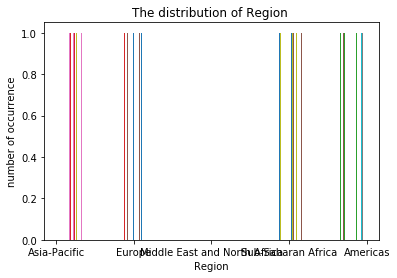

In [18]:
plt.hist(df.Region)
plt.title("The distribution of Region ")
plt.xlabel("Region")
plt.ylabel("number of occurrence")
plt.show()

In [19]:
from scipy import stats
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CountryID                      92.500
World Rank                     89.500
Region Rank                    21.250
2019 Score                     13.850
Property Rights                28.900
Judical Effectiveness          23.700
Government Integrity           23.100
Tax Burden                     14.450
Gov't Spending                 30.900
Fiscal Health                  51.550
Business Freedom               20.900
Labor Freedom                  17.775
Monetary Freedom               10.075
Trade Freedom                  17.650
Investment Freedom             30.000
Financial Freedom              30.000
Tariff Rate (%)                 6.775
Income Tax Rate (%)            15.000
Corporate Tax Rate (%)         10.000
Tax Burden % of GDP            15.600
Gov't Expenditure % of GDP     15.550
GDP Growth Rate (%)             2.850
5 Year GDP Growth Rate (%)      2.550
Inflation (%)                   4.150
Public Debt (% of GDP)         35.175
dtype: float64


In [20]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.strip()



In [21]:
for col in df.columns: 
    print(col)

CountryID
CountryName
WEBNAME
Region
WorldRank
RegionRank
2019Score
PropertyRights
JudicalEffectiveness
GovernmentIntegrity
TaxBurden
Gov'tSpending
FiscalHealth
BusinessFreedom
LaborFreedom
MonetaryFreedom
TradeFreedom
InvestmentFreedom
FinancialFreedom
TariffRate(%)
IncomeTaxRate(%)
CorporateTaxRate(%)
TaxBurden%ofGDP
Gov'tExpenditure%ofGDP
Country
Population(Millions)
GDP(Billions,PPP)
GDPGrowthRate(%)
5YearGDPGrowthRate(%)
GDPperCapita(PPP)
Unemployment(%)
Inflation(%)
FDIInflow(Millions)
PublicDebt(%ofGDP)


In [22]:
df.columns = map(str.lower, df.columns)


In [23]:
for col in df.columns: 
    print(col)

countryid
countryname
webname
region
worldrank
regionrank
2019score
propertyrights
judicaleffectiveness
governmentintegrity
taxburden
gov'tspending
fiscalhealth
businessfreedom
laborfreedom
monetaryfreedom
tradefreedom
investmentfreedom
financialfreedom
tariffrate(%)
incometaxrate(%)
corporatetaxrate(%)
taxburden%ofgdp
gov'texpenditure%ofgdp
country
population(millions)
gdp(billions,ppp)
gdpgrowthrate(%)
5yeargdpgrowthrate(%)
gdppercapita(ppp)
unemployment(%)
inflation(%)
fdiinflow(millions)
publicdebt(%ofgdp)


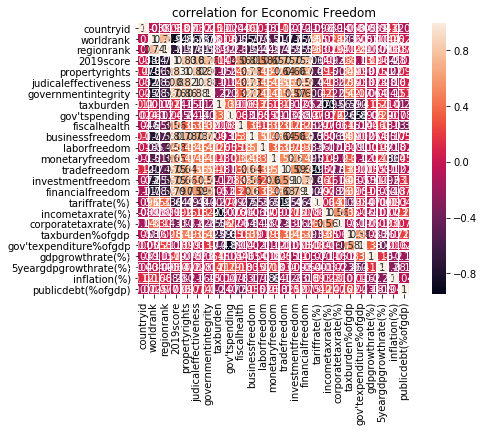

In [51]:
import seaborn as sns

corrmat_df = df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation for Economic Freedom")

plt.show()

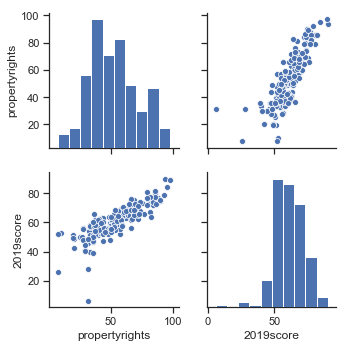

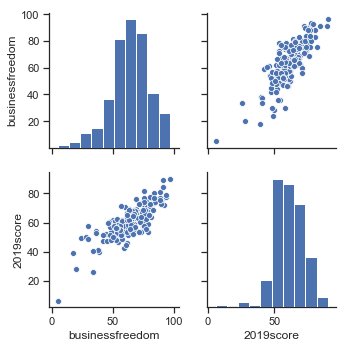

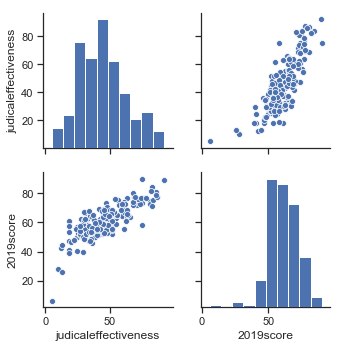

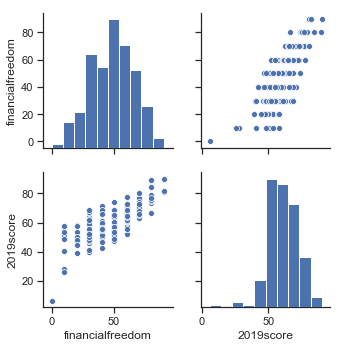

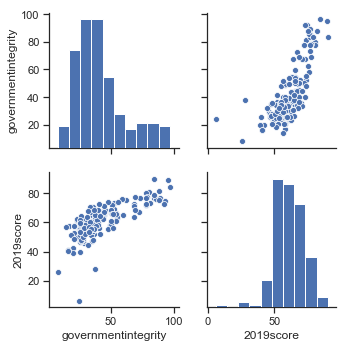

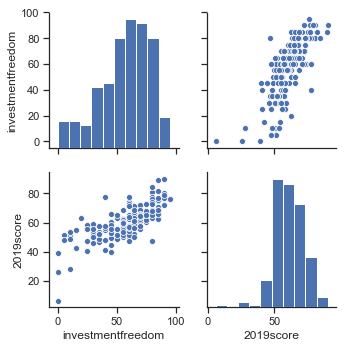

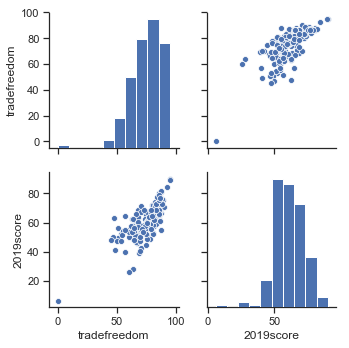

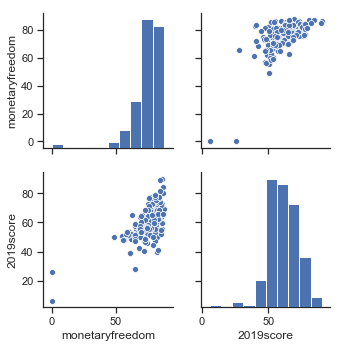

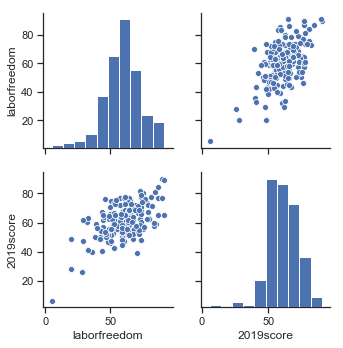

In [52]:


import seaborn as sns
sns.set(style="ticks") 
sns.pairplot(df[['propertyrights', '2019score']])
sns.pairplot(df[['businessfreedom', '2019score']])
sns.pairplot(df[['judicaleffectiveness', '2019score']])
sns.pairplot(df[['financialfreedom', '2019score']])
sns.pairplot(df[['governmentintegrity', '2019score']])
sns.pairplot(df[['investmentfreedom', '2019score']])
sns.pairplot(df[['tradefreedom', '2019score']])
sns.pairplot(df[['monetaryfreedom', '2019score']])
sns.pairplot(df[['laborfreedom', '2019score']])


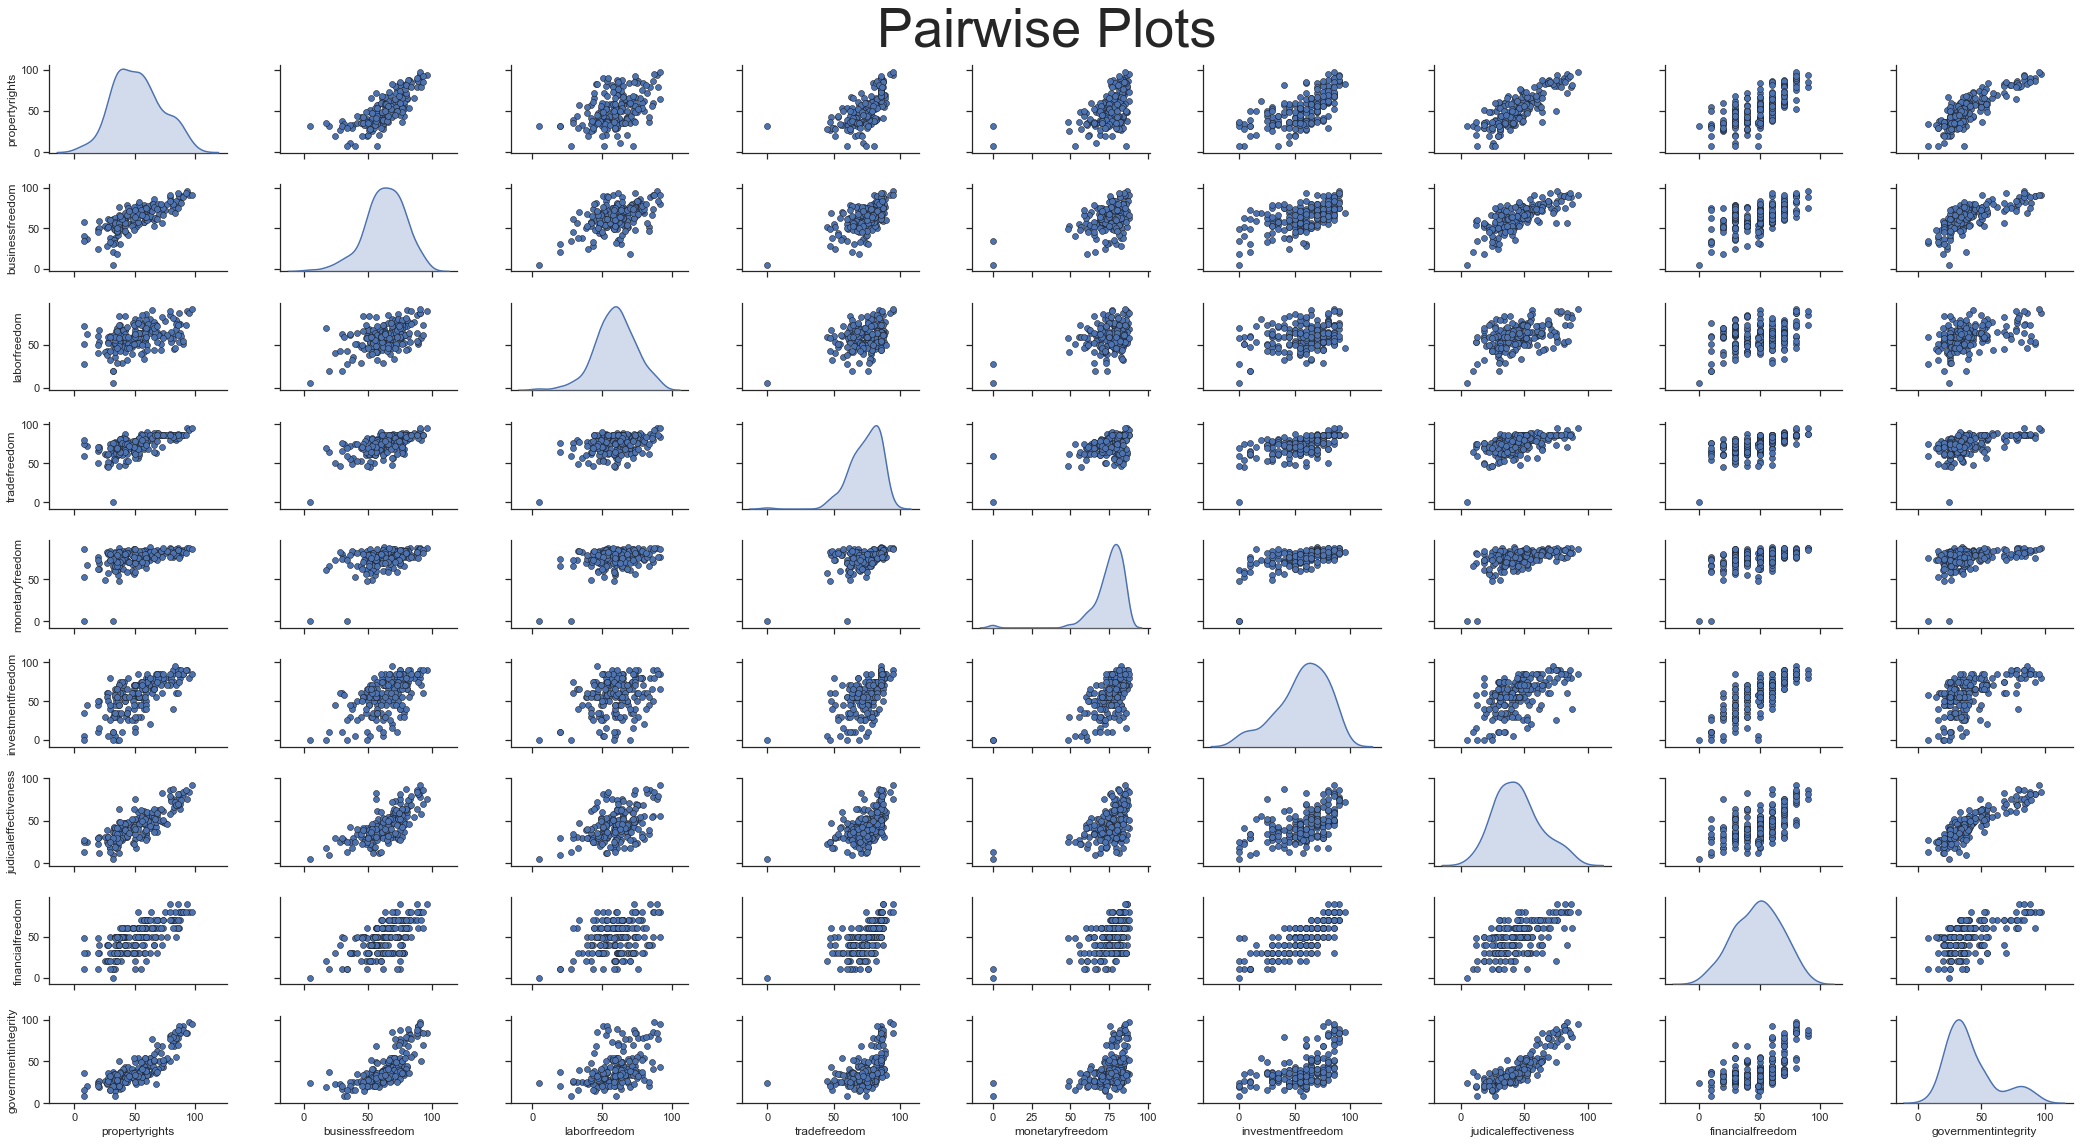

In [54]:


cols = ['propertyrights', 'businessfreedom', 'laborfreedom', 'tradefreedom', 'monetaryfreedom','investmentfreedom', 'judicaleffectiveness', 'financialfreedom', 'governmentintegrity' ]
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=54)

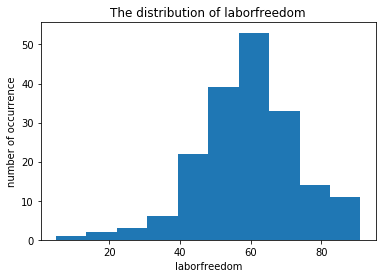

In [26]:
plt.hist(df.laborfreedom)
plt.title("The distribution of laborfreedom")
plt.xlabel("laborfreedom")
plt.ylabel("number of occurrence")
plt.show()

In [29]:
df.corr()

,countryid,worldrank,regionrank,2019score,propertyrights,judicaleffectiveness,governmentintegrity,taxburden,gov'tspending,fiscalhealth,...,financialfreedom,tariffrate(%),incometaxrate(%),corporatetaxrate(%),taxburden%ofgdp,gov'texpenditure%ofgdp,gdpgrowthrate(%),5yeargdpgrowthrate(%),inflation(%),publicdebt(%ofgdp)
countryid,1.000000,-0.037574,-0.019474,0.037610,0.069558,0.032246,0.024981,0.112935,0.024323,-0.046190,...,-0.117157,-0.095527,-0.089311,-0.142239,-0.057784,-0.005043,-0.039135,-0.042981,0.117721,-0.069724
worldrank,-0.037574,1.000000,0.737060,-0.938328,-0.862262,-0.783510,-0.777058,0.001651,0.061147,-0.552224,...,-0.782137,0.546004,-0.027692,0.333975,-0.356061,-0.005270,-0.108975,0.004356,0.158491,0.024561
regionrank,-0.019474,0.737060,1.000000,-0.713517,-0.567211,-0.606432,-0.578832,-0.092319,-0.200618,-0.308334,...,-0.594273,0.326258,-0.028547,0.138492,0.002812,0.209026,-0.056843,-0.095489,0.087730,0.077280
2019score,0.037610,-0.938328,-0.713517,1.000000,0.830409,0.804253,0.763715,0.137279,0.045461,0.563171,...,0.790032,-0.636272,0.009201,-0.327574,0.298399,-0.129428,0.188446,0.063560,-0.276533,-0.036412
propertyrights,0.069558,-0.862262,-0.567211,0.830409,1.000000,0.822445,0.855428,-0.153225,-0.235260,0.350158,...,0.727224,-0.492647,0.155824,-0.297578,0.485731,0.098852,-0.074934,0.071906,-0.198389,0.096942
judicaleffectiveness,0.032246,-0.783510,-0.606432,0.804253,0.822445,1.000000,0.878679,-0.113761,-0.135135,0.335370,...,0.608063,-0.442519,0.182569,-0.216257,0.358283,0.032583,-0.022751,0.028141,-0.155026,0.074158
governmentintegrity,0.024981,-0.777058,-0.578832,0.763715,0.855428,0.878679,1.000000,-0.218628,-0.302520,0.315531,...,0.625537,-0.403071,0.225080,-0.252158,0.421746,0.167446,-0.064211,0.013631,-0.152093,0.103467
taxburden,0.112935,0.001651,-0.092319,0.137279,-0.153225,-0.113761,-0.218628,1.000000,0.393912,0.016279,...,-0.051673,-0.265821,-0.898048,-0.555456,-0.588508,-0.403075,0.153649,0.209151,-0.010373,-0.237029
gov'tspending,0.024323,0.061147,-0.200618,0.045461,-0.235260,-0.135135,-0.302520,0.393912,1.000000,0.082900,...,-0.131152,0.078780,-0.075622,0.216163,-0.654658,-0.887607,-0.050105,0.293019,-0.007844,-0.076822
fiscalhealth,-0.046190,-0.552224,-0.308334,0.563171,0.350158,0.335370,0.315531,0.016279,0.082900,1.000000,...,0.260901,-0.268554,0.075790,-0.063895,0.154495,-0.141536,0.046226,0.179097,-0.127881,-0.313850


In [34]:
df[df.columns[1:]].corr()['2019score'][:]


worldrank                -0.938328
regionrank               -0.713517
2019score                 1.000000
propertyrights            0.830409
judicaleffectiveness      0.804253
governmentintegrity       0.763715
taxburden                 0.137279
gov'tspending             0.045461
fiscalhealth              0.563171
businessfreedom           0.812523
laborfreedom              0.579635
monetaryfreedom           0.645076
tradefreedom              0.753086
investmentfreedom         0.754252
financialfreedom          0.790032
tariffrate(%)            -0.636272
incometaxrate(%)          0.009201
corporatetaxrate(%)      -0.327574
taxburden%ofgdp           0.298399
gov'texpenditure%ofgdp   -0.129428
gdpgrowthrate(%)          0.188446
5yeargdpgrowthrate(%)     0.063560
inflation(%)             -0.276533
publicdebt(%ofgdp)       -0.036412
Name: 2019score, dtype: float64

In [37]:

df["propertyrights"].fillna(df["propertyrights"].mean(), inplace=True)
df["businessfreedom"].fillna(df["businessfreedom"].mean(), inplace=True)
df["judicaleffectiveness"].fillna(df["judicaleffectiveness"].mean(), inplace=True)
df["financialfreedom"].fillna(df["financialfreedom"].mean(), inplace=True)
df["governmentintegrity"].fillna(df["governmentintegrity"].mean(), inplace=True)
df["investmentfreedom"].fillna(df["investmentfreedom"].mean(), inplace=True)
df["tradefreedom"].fillna(df["tradefreedom"].mean(), inplace=True)
df["monetaryfreedom"].fillna(df["monetaryfreedom"].mean(), inplace=True)
df["laborfreedom"].fillna(df["laborfreedom"].mean(), inplace=True)

In [38]:
def fill_that_column (df, column_name):

    return df[column_name].fillna(df[column_name].mean(), inplace=True)

#function definition for the specific columns:

def fill_all_columns(df, col_list):

    for col in col_list:
    
        fill_that_column(df, col)


In [39]:
df.isnull().sum()*100/df.isnull().count()

countryid                 0.000000
countryname               0.000000
webname                   0.000000
region                    0.000000
worldrank                 3.225806
regionrank                3.225806
2019score                 3.225806
propertyrights            0.000000
judicaleffectiveness      0.000000
governmentintegrity       0.000000
taxburden                 3.225806
gov'tspending             1.612903
fiscalhealth              1.612903
businessfreedom           0.000000
laborfreedom              0.000000
monetaryfreedom           0.000000
tradefreedom              0.000000
investmentfreedom         0.000000
financialfreedom          0.000000
tariffrate(%)             2.150538
incometaxrate(%)          1.612903
corporatetaxrate(%)       1.612903
taxburden%ofgdp           3.763441
gov'texpenditure%ofgdp    2.150538
country                   0.000000
population(millions)      0.000000
gdp(billions,ppp)         0.537634
gdpgrowthrate(%)          1.075269
5yeargdpgrowthrate(%

In [40]:
df[df.columns[1:]].corr()['2019score'][:]


worldrank                -0.938328
regionrank               -0.713517
2019score                 1.000000
propertyrights            0.830409
judicaleffectiveness      0.804253
governmentintegrity       0.763715
taxburden                 0.137279
gov'tspending             0.045461
fiscalhealth              0.563171
businessfreedom           0.812523
laborfreedom              0.579635
monetaryfreedom           0.645076
tradefreedom              0.753086
investmentfreedom         0.754252
financialfreedom          0.790032
tariffrate(%)            -0.636272
incometaxrate(%)          0.009201
corporatetaxrate(%)      -0.327574
taxburden%ofgdp           0.298399
gov'texpenditure%ofgdp   -0.129428
gdpgrowthrate(%)          0.188446
5yeargdpgrowthrate(%)     0.063560
inflation(%)             -0.276533
publicdebt(%ofgdp)       -0.036412
Name: 2019score, dtype: float64

Based on the feature engineering done above, I have deduced the highest correlated variables impacting saleprice below are:

propertyrights            0.830409<br>
businessfreedom           0.812523<br>
judicaleffectiveness      0.804253<br>
financialfreedom          0.790032<br>
governmentintegrity       0.763715<br>
investmentfreedom         0.754252<br>
tradefreedom              0.753086<br>
monetaryfreedom           0.645076<br>
laborfreedom              0.579635<br>

These are the 9 variables that I found most impactful to sale prices based on the .corr list below as well as other data exploration steps done above. For this reason I will be using these variables in my model preparations further in this challenge.


In [42]:


from scipy.stats import zscore
import numpy as np

z_scores = zscore(df["propertyrights"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    

z_scores = zscore(df["businessfreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(df["judicaleffectiveness"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(df["financialfreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(df["governmentintegrity"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(df["investmentfreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(df["tradefreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(df["monetaryfreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(df["laborfreedom"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))


The score threshold is: 1
The indices of the outliers:
(array([  6,   7,  14,  29,  43,  44,  45,  54,  58,  59,  63,  72,  74,
        79,  80,  83,  89, 100, 101, 106, 121, 122, 126, 139, 149, 151,
       155, 159, 160, 162, 175, 176, 177]),)
Number of outliers is: 33
The score threshold is: 2
The indices of the outliers:
(array([ 72, 122, 149, 176]),)
Number of outliers is: 4
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 1
The indices of the outliers:
(array([  6,  22,  29,  45,  58,  59,  62,  63,  72,  74,  79,  83,  89,
       103, 106, 111, 121, 122, 126, 135, 149, 151, 159, 162, 165, 175,
       176, 177]),)
Number of outliers is: 28
The score threshold is: 2
The indices of the outliers:
(array([72]),)
Number of outliers is: 1
The score threshold is: 3
The indices of the outliers:
(array([],

In [44]:
  

from scipy.stats.mstats import winsorize

winsorized_propertyrights = winsorize(df["propertyrights"], (0, 0.05))
winsorized_businessfreedom = winsorize(df["businessfreedom"], (0, 0.05))
winsorized_judicaleffectiveness = winsorize(df["judicaleffectiveness"], (0, 0.05))
winsorized_governmentintegrity = winsorize(df["governmentintegrity"], (0, 0.05))
winsorized_investmentfreedom = winsorize(df["investmentfreedom"], (0, 0.05))
winsorized_tradefreedom = winsorize(df["tradefreedom"], (0, 0.05))
winsorized_monetaryfreedom = winsorize(df["monetaryfreedom"], (0, 0.05))
winsorized_laborfreedom = winsorize(df["laborfreedom"], (0, 0.05))
winsorized_financialfreedom = winsorize(df["financialfreedom"], (0, 0.05))



In [47]:

X = df[['propertyrights', 'businessfreedom', 'judicaleffectiveness', 'governmentintegrity', 'investmentfreedom', 'tradefreedom', 'monetaryfreedom', 'laborfreedom', 'financialfreedom' ]] 
Y = df['2019score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()
results_TEST = sm.OLS(y_test, X_test).fit()


results.summary()

results_TEST.summary()


#Create a dataframe with the new data I am joining (presumably by month/year and averaging ex: interest rate dataframe) and then create a NEW df where you join those two and then you have a new column list when you create your X, 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              2019score   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 27 Sep 2019   Prob (F-statistic):                nan
Time:                        13:59:39   Log-Likelihood:                    nan
No. Observations:                  38   AIC:                               nan
Df Residuals:                      29   BIC:                               nan
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
propertyrights              nan        nan        nan        nan         nan         nan
businessfreedom             nan        nan        nan        nan         nan         nan
judicaleffectiveness        nan        nan        nan        nan         nan         nan
governmentintegrity         nan        nan        nan        nan         nan         nan
investmentfreedom           nan        nan        nan        nan         nan         nan
tradefreedom                nan        nan        nan        nan         nan         nan
monetaryfreedom             nan        nan        nan        nan         nan         nan
laborfreedom                nan        nan        nan        nan         nan         nan
financialfreedom            nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge() 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Lasso Regression

In [57]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ElasticNet Regression 

In [59]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Linear Regression

In [60]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').